# Classifying Dog and Cat using CNN on Tensorflow 2.x


This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select _CONNECT_.
2. Run all the notebook code cells: Select _Runtime_ > _Run all_.


##Problem Statement


**Dataset:** The Dogs vs. Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat
<br>
It was only effectively addressed in the last few years using deep learning convolutional neural networks. While the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification


####**Tasks to be Performed**


In this tutorial you will be performing the following tasks:

- Prepare the dataset for the model
- Install Tensorflow 2.x
- Develop convolutional neural network model for classifying the images or Dog Vs cat
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layers check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy


####**Dataset Description**


The **Dog Vs Cat** image classification dataset consists of 8005 images belonging to 2 classes for training images and 2023 images belonging to 2 classes for testing images

1.  Class I = Dog
2.  Class II= Cat

![alt text](https://imgur.com/d8Qd1hD.gif)


####**Skills Gained**


TensorFlow 2.x

- Convolutional neural network implementation
- Model Improvisation
- Model Save
- Load the pretrained model


# Solution: Classifying Dog and Cat using CNN on Tensorflow 2.x


##Pre-process the Dataset


#####<b>Before start coding please enable your GPU


![alt text](https://i.imgur.com/QGIPBWR.png)


#### <b> Load the Dataset


In [ ]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2024-05-26 01:39:51--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2024-05-26 01:39:52--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbc15d800444340881347c68db8.dl.dropboxusercontent.com/cd/0/inline/CTlc3DRHCTOo3iBowGKlsWI1vCMBE5N_ho0bGvQi0KmP0h9FumCitkEf1G_YAS4r4Pvi1zVCaTWnFSJ3zcsjaYJlOCnW_FeWLwuRJwOduP5YnqJufRaX8wDNxznZb9xdyWI2uoc51GHDpSfYYgpP0bKV/file# [following]
--2024-05-26 01:39:52--  https://ucbc15d800444340881347c68db8.dl.dropboxusercontent.com/cd/0/inline/CTlc3DRHCTOo3iBowGKlsWI1vCMBE5N_ho0bGvQi0KmP0h9FumCitkEf1G_YAS4r4Pvi1zVCaTWnFSJ3zcsjaYJ

#### <b> Unzip the Data


In [ ]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

#### <b> Visualize the Data


Populating the interactive namespace from numpy and matplotlib


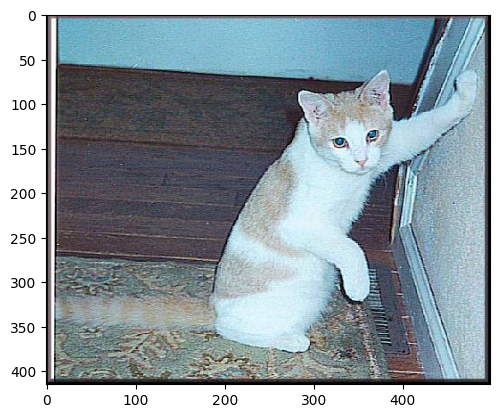

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/test_set/test_set/cats/cat.4001.jpg')
imgplot = plt.imshow(img)
plt.show()

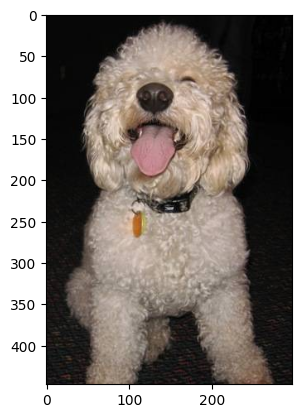

In [ ]:

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


## Import Libraries


In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#####Check the TensorFlow version


In [ ]:
print(tensorflow.__version__)

2.15.0


## Designing the Model


#### <b> Initialize the parameters


In [ ]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"/content/training_set/training_set" # /content/training_set/training_set
validation_data_dir=r"/content/test_set/test_set"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

#### <b> Check the shape of the image


Two ways to to represent the image data as a three dimensional array

1. <b> Channels Last:<b> Image data is represented in a three-dimensional array where the last channel represents the color channels, e.g. [rows][cols][channels].

2. <b> Channels First:<b> Image data is represented in a three-dimensional array where the first channel represents the color channels, e.g. [channels][rows][cols].


In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)


In [ ]:
input_shape

(150, 150, 3)

#### <b> Generate Images to train the model


1.  Rescale
2.  Shear_range
3.  Zoom_range
4.  Horizontal_flip

![alt text](https://i.imgur.com/Az24gjL.png)

- This class allows to configure random transformations and normalization on the allocated image during training time
- Prevents overfitting and helps to generate a generalize model
- Never repeats the exact same images twice to train our model


In [ ]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)


test_datagen=ImageDataGenerator (rescale=1. /255) # No augumentation


train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])
#Now this, will generate training generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)


validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')
#Now, this will generate testing generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)



Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


####**Visual Representation of ImageDataGenerator**


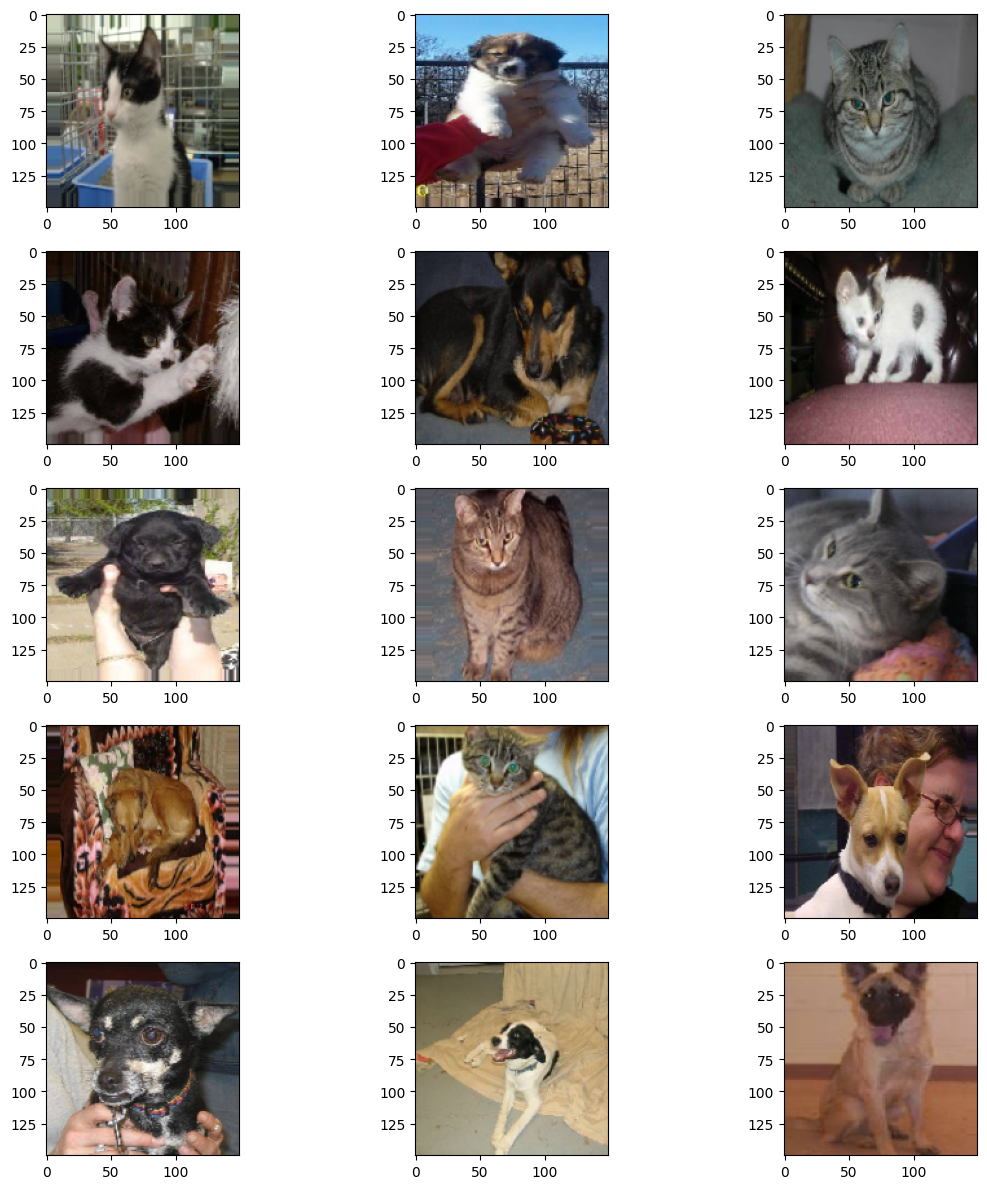

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### <b> Build the basic CNN model 0


####<b> Layers in CNN:


<b>

1.  Conlutional Layer
2.  ReLu
3.  Pooling Layer
4.  Fully Connected Layer (Dense)

![alt text](https://i.imgur.com/P4yvxRW.png)


![alt text](https://i.imgur.com/a2vSxQW.png)

- Adding convolutional neural network in the model
- add() - Helps to add layers in the model
- Conv2D() - Convolutional layer (to extract features from the images)
- Conv2D(32,(3,3),input_shape=input_shape)

  - 32 - Take 32 features from the given image
  - (3,3) - Metrics size of the images(3\*3)
  - input_shape = image size

- Activation function (relu) is added to remove the negative values


In [ ]:
input_shape

(150, 150, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,padding="same")) #64 neurons with 3*3 filter
#This class allows to create convolutional neural network to extract feature from the images
# model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))#MaxPooling2D helps to reduce the size of the data

model.add(Flatten())#Converts multi dimensional array to 1D channel
model.add(Dense(64)) #64 neurons with 3*3 filter
#Numbers of output nodes in the hidden layer
model.add(Activation('relu'))
model.add(Dense(1)) #output layer
model.add(Activation('sigmoid')) #sigmoid activation function
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 360000)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                23040064  
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                      

In [ ]:
 75*75*64

360000

#### <b> Compile the basic CNN model


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 360000)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                23040064  
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                      

#### <b> Fit the basic CNN model


In [ ]:
training = model.fit(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 23s 178ms/step - loss: 1.3553 - accuracy: 0.4902 - val_loss: 0.6932 - val_accuracy: 0.5005
Epoch 2/20
100/100 [==============================] - 18s 180ms/step - loss: 0.6930 - accuracy: 0.5210 - val_loss: 0.6933 - val_accuracy: 0.4985
Epoch 3/20
100/100 [==============================] - 16s 161ms/step - loss: 0.6934 - accuracy: 0.4902 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 4/20
100/100 [==============================] - 18s 180ms/step - loss: 0.7195 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.4975
Epoch 5/20
100/100 [==============================] - 20s 205ms/step - loss: 0.6938 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/20
100/100 [==============================] - 19s 187ms/step - loss: 0.6932 - accuracy: 0.4892 - val_loss: 0.6932 - val_accuracy: 0.4990
Epoch 7/20
100/100 [==============================] - 17s 167ms/step - loss: 0.7024 - accuracy: 0.4882 - val_loss: 0.6931 - val_ac

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


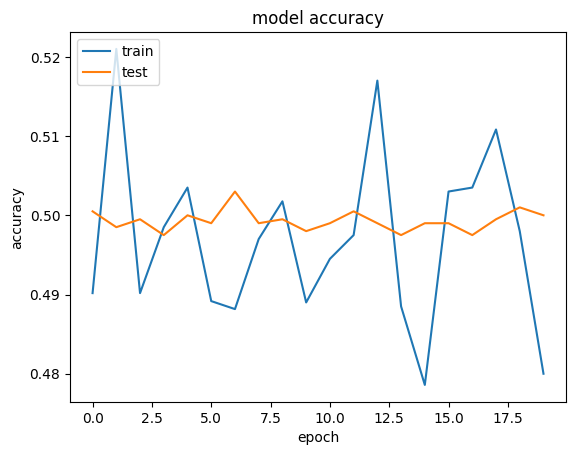

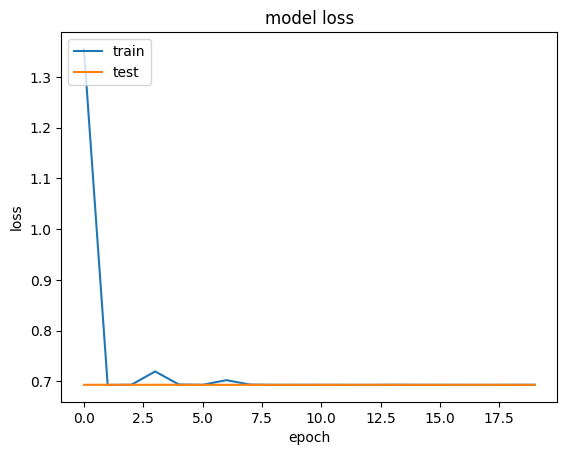

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


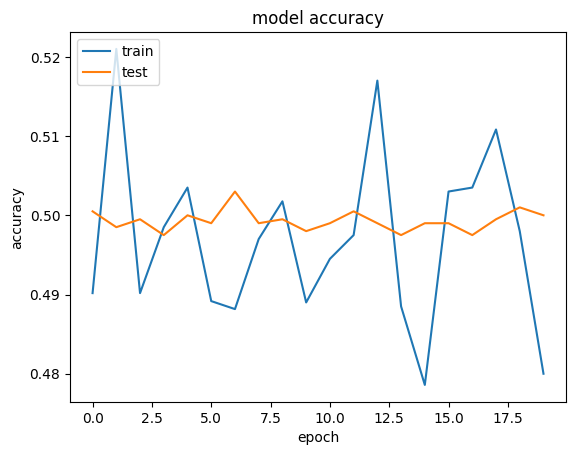

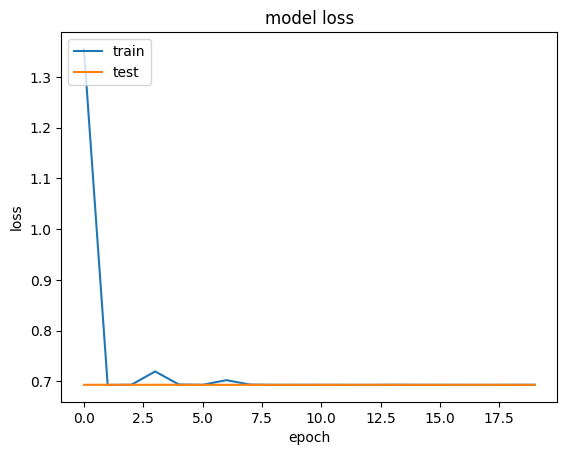

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


1/1 [==============================] - 0s 235ms/step
[[0.49917668]]
Prediction:  Cat


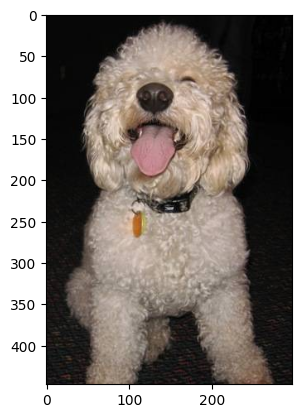

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0) # 1,height, width, 3

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


####<b> Predict the image


1/1 [==============================] - 0s 17ms/step
[[0.49917668]]
Prediction:  Cat


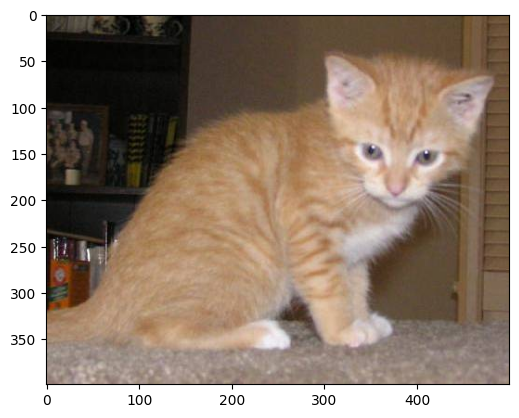

In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


In [ ]:
model.layers[0].get_weights()[0].shape

(3, 3, 3, 64)

### <b> Build the basic CNN model 1


####<b> Let's add add some layers to prevent ovetfitting


**Dropout:** used to deactive some neurons randomly to prevent overfitting
<br>
**Early Stop:**
To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased
<br>
**Learning Rate Reduction:**
We will reduce the learning rate when then accuracy not increase for 2 steps

- monitor: quantity to be monitored.
- factor: factor by which the learning rate will be reduced. new_lr = lr \* factor
- patience: number of epochs with no improvement after which learning rate will be reduced.
- verbose: int. 0: quiet, 1: update messages.
- mode: one of {auto, min, max}. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; in max mode it will be reduced when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity.
- min_delta: threshold for measuring the new optimum, to only focus on significant changes.
- cooldown: number of epochs to wait before resuming normal operation after lr has been reduced.
- min_lr: lower bound on the learning rate.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

model1 = Sequential()
model1.add(Conv2D(64,(3,3),input_shape=input_shape)) #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(64)) #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(Dropout(0.5))#Prevents overfitting of the model and it has the effect of reducing the capacity or thinning the network during training
model1.add(Dense(1)) #output layer
model1.add(Activation('sigmoid')) #sigmoid activation function
model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_6 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 350464)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                22429760  
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                      

#### <b> Compile the basic CNN model1


In [ ]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_6 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 350464)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                22429760  
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                      

#### <b> Fit the basic CNN model1


In [ ]:
training = model1.fit(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/20


<ipython-input-26-ef346db75b1a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model1.fit_generator(train_generator,


100/100 [==============================] - ETA: 0s - loss: 1.1610 - accuracy: 0.5345

100/100 [==============================] - 24s 210ms/step - loss: 1.1610 - accuracy: 0.5345 - val_loss: 0.6871 - val_accuracy: 0.5155 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - ETA: 0s - loss: 0.6877 - accuracy: 0.5500

100/100 [==============================] - 16s 159ms/step - loss: 0.6877 - accuracy: 0.5500 - val_loss: 0.6672 - val_accuracy: 0.6025 - lr: 0.0010
Epoch 3/20
100/100 [==============================] - ETA: 0s - loss: 0.6759 - accuracy: 0.5845

100/100 [==============================] - 16s 161ms/step - loss: 0.6759 - accuracy: 0.5845 - val_loss: 0.6516 - val_accuracy: 0.6345 - lr: 0.0010
Epoch 4/20
100/100 [==============================] - ETA: 0s - loss: 0.6715 - accuracy: 0.5768

100/100 [==============================] - 19s 193ms/step - loss: 0.6715 - accuracy: 0.5768 - val_loss: 0.6641 - val_accuracy: 0.6240 - lr: 0.0010
Epoch 5/20
100/100 [==============================] - ETA: 0s - loss: 0.6704 - accuracy: 0.6195

100/100 [==============================] - 16s 155ms/step - loss: 0.6704 - accuracy: 0.6195 - val_loss: 0.6555 - val_accuracy: 0.6190 - lr: 0.0010
Epoch 6/20
100/100 [==============================] - ETA: 0s - loss: 0.6688 - accuracy: 0.6050

100/100 [==============================] - 20s 196ms/step - loss: 0.6688 - accuracy: 0.6050 - val_loss: 0.6400 - val_accuracy: 0.6445 - lr: 0.0010
Epoch 7/20
100/100 [==============================] - ETA: 0s - loss: 0.6400 - accuracy: 0.6465

100/100 [==============================] - 16s 158ms/step - loss: 0.6400 - accuracy: 0.6465 - val_loss: 0.6286 - val_accuracy: 0.6380 - lr: 0.0010
Epoch 8/20
100/100 [==============================] - ETA: 0s - loss: 0.6421 - accuracy: 0.6358

100/100 [==============================] - 18s 178ms/step - loss: 0.6421 - accuracy: 0.6358 - val_loss: 0.6229 - val_accuracy: 0.6665 - lr: 0.0010
Epoch 9/20
100/100 [==============================] - ETA: 0s - loss: 0.6377 - accuracy: 0.6405

100/100 [==============================] - 18s 180ms/step - loss: 0.6377 - accuracy: 0.6405 - val_loss: 0.6330 - val_accuracy: 0.6380 - lr: 0.0010
Epoch 10/20
100/100 [==============================] - ETA: 0s - loss: 0.6333 - accuracy: 0.6610

100/100 [==============================] - 18s 179ms/step - loss: 0.6333 - accuracy: 0.6610 - val_loss: 0.6569 - val_accuracy: 0.6315 - lr: 0.0010
Epoch 11/20
100/100 [==============================] - ETA: 0s - loss: 0.6238 - accuracy: 0.6585

100/100 [==============================] - 18s 179ms/step - loss: 0.6238 - accuracy: 0.6585 - val_loss: 0.6217 - val_accuracy: 0.6705 - lr: 0.0010
Epoch 12/20
100/100 [==============================] - ETA: 0s - loss: 0.6324 - accuracy: 0.6685

100/100 [==============================] - 18s 178ms/step - loss: 0.6324 - accuracy: 0.6685 - val_loss: 0.6269 - val_accuracy: 0.6625 - lr: 0.0010
Epoch 13/20
100/100 [==============================] - ETA: 0s - loss: 0.6322 - accuracy: 0.6430

100/100 [==============================] - 16s 158ms/step - loss: 0.6322 - accuracy: 0.6430 - val_loss: 0.6046 - val_accuracy: 0.6820 - lr: 0.0010
Epoch 14/20
100/100 [==============================] - ETA: 0s - loss: 0.6184 - accuracy: 0.6565

100/100 [==============================] - 16s 163ms/step - loss: 0.6184 - accuracy: 0.6565 - val_loss: 0.6131 - val_accuracy: 0.6755 - lr: 0.0010
Epoch 15/20
100/100 [==============================] - ETA: 0s - loss: 0.6050 - accuracy: 0.6851

100/100 [==============================] - 18s 178ms/step - loss: 0.6050 - accuracy: 0.6851 - val_loss: 0.6323 - val_accuracy: 0.6585 - lr: 0.0010
Epoch 16/20
100/100 [==============================] - ETA: 0s - loss: 0.6086 - accuracy: 0.6815

100/100 [==============================] - 17s 166ms/step - loss: 0.6086 - accuracy: 0.6815 - val_loss: 0.6416 - val_accuracy: 0.6535 - lr: 0.0010
Epoch 17/20
100/100 [==============================] - ETA: 0s - loss: 0.6051 - accuracy: 0.6725

100/100 [==============================] - 18s 180ms/step - loss: 0.6051 - accuracy: 0.6725 - val_loss: 0.6026 - val_accuracy: 0.6835 - lr: 0.0010
Epoch 18/20
100/100 [==============================] - ETA: 0s - loss: 0.5935 - accuracy: 0.6880

100/100 [==============================] - 16s 158ms/step - loss: 0.5935 - accuracy: 0.6880 - val_loss: 0.6278 - val_accuracy: 0.6755 - lr: 0.0010
Epoch 19/20
100/100 [==============================] - ETA: 0s - loss: 0.5990 - accuracy: 0.6815

100/100 [==============================] - 16s 158ms/step - loss: 0.5990 - accuracy: 0.6815 - val_loss: 0.5923 - val_accuracy: 0.6935 - lr: 0.0010
Epoch 20/20
100/100 [==============================] - ETA: 0s - loss: 0.5872 - accuracy: 0.7070

100/100 [==============================] - 18s 179ms/step - loss: 0.5872 - accuracy: 0.7070 - val_loss: 0.6145 - val_accuracy: 0.6825 - lr: 0.0010


#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


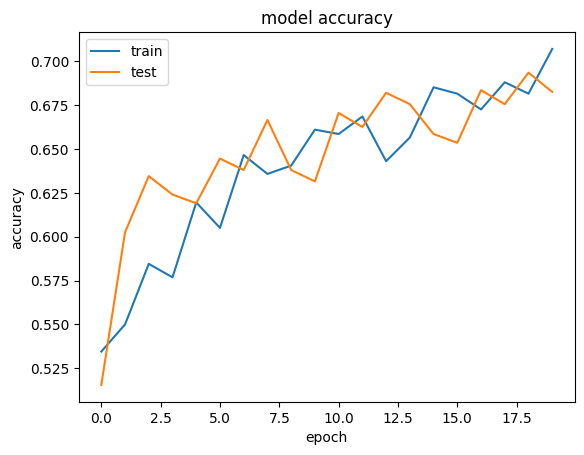

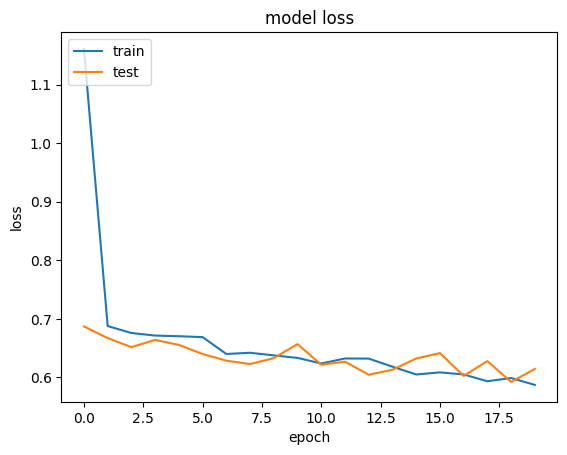

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


1/1 [==============================] - 0s 104ms/step
[[1.]]
Prediction:  Dog


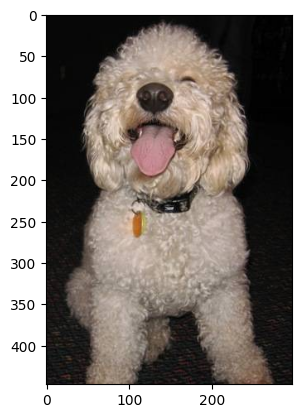

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model1.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


1/1 [==============================] - 0s 17ms/step
[[1.]]
Prediction:  Dog


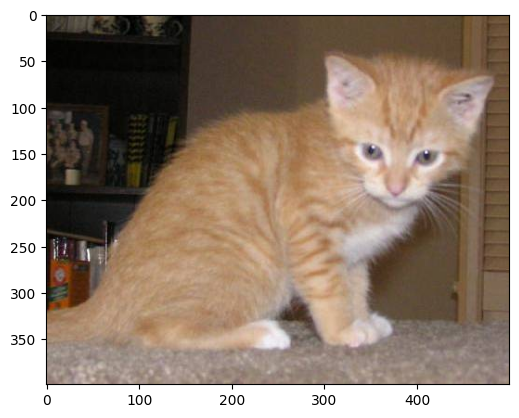

In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model1.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat" #int('Prediction: ',prediction)
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


### <b> Build the basic CNN model 2


![alt text](https://i.imgur.com/wpLHgqN.jpg)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

model2 = Sequential()
model2.add(Conv2D(32,(3,3),input_shape=input_shape))
#model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid')) # 2 because we have cat and dog classes




#### <b> Compile the basic CNN model2


In [ ]:
#model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_12 (Ba  (None, 148, 148, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_13 (Ba  (None, 72, 72, 64)       

#### <b> Fit the basic CNN model2


In [ ]:
training = model2.fit(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/20
100/100 [==============================] - 20s 185ms/step - loss: 1.0925 - accuracy: 0.5753 - val_loss: 2.2452 - val_accuracy: 0.5005 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - 18s 182ms/step - loss: 0.8321 - accuracy: 0.5970 - val_loss: 0.8689 - val_accuracy: 0.5060 - lr: 0.0010
Epoch 3/20
100/100 [==============================] - 20s 204ms/step - loss: 0.7678 - accuracy: 0.5955 - val_loss: 0.7462 - val_accuracy: 0.6015 - lr: 0.0010
Epoch 4/20
100/100 [==============================] - 18s 180ms/step - loss: 0.6671 - accuracy: 0.6390 - val_loss: 0.6904 - val_accuracy: 0.6525 - lr: 0.0010
Epoch 5/20
100/100 [==============================] - 20s 198ms/step - loss: 0.6309 - accuracy: 0.6755 - val_loss: 0.6902 - val_accuracy: 0.6335 - lr: 0.0010
Epoch 6/20
100/100 [==============================] - 20s 202ms/step - loss: 0.5980 - accuracy: 0.6885 - val_loss: 0.5892 - val_accuracy: 0.6780 - lr: 0.0010
Epoch 7/20
100/100 [==============================] 

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


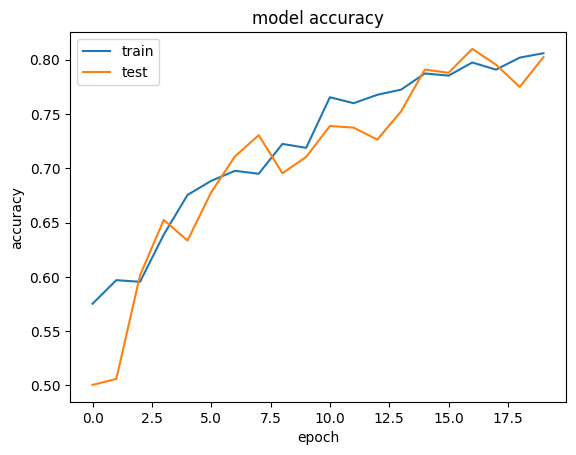

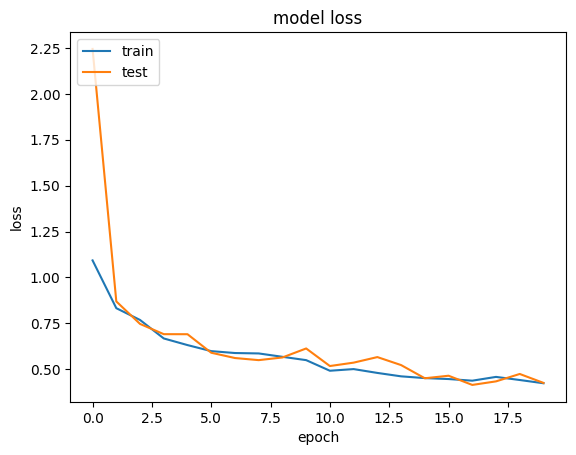

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


1/1 [==============================] - 0s 468ms/step
[[1.]]
Prediction:  Dog


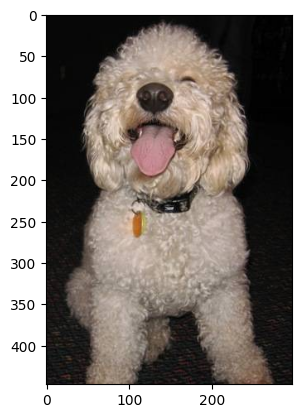

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model2.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


1/1 [==============================] - 0s 32ms/step
[[1.]]
Prediction:  Dog


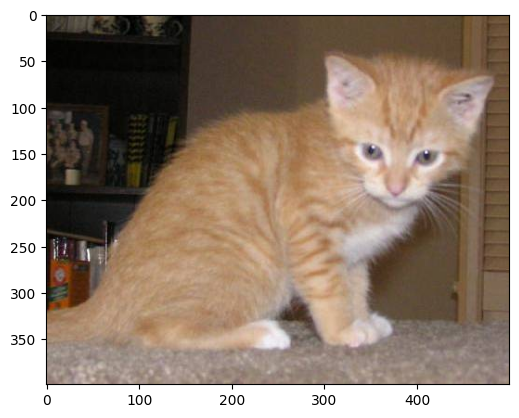

In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model2.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


####Freeze the model


In [ ]:

import json
from keras.models import model_from_json
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# serialize model to JSON
#model_json = model.to_json()
#model2 = Sequential()

model_json = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)



model2.save_weights('first_try.h5')
print("[INFO] Saved model to disk")


[INFO] Saved model to disk


#### Load the model


Loaded model from disk
1/1 [==============================] - 0s 18ms/step
Output from previous model is [[1.]]
1/1 [==============================] - 0s 127ms/step
Output from loaded model is [[0.]]
Prediction:  Cat


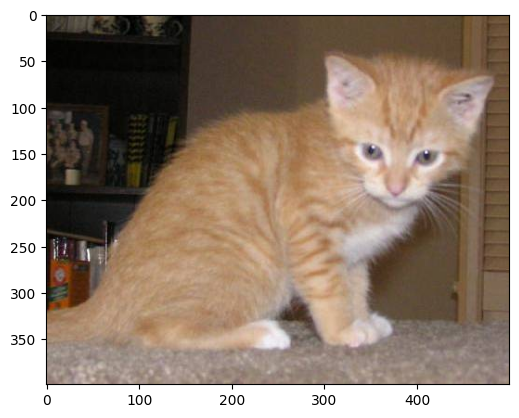

In [ ]:
# load json and create model
json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("first_try.h5")
print("Loaded model from disk")
# load the model we saved
#model=load_model("kwhFinal.h5")

# predicting images
img = image.load_img(r"/content/training_set/training_set/cats/cat.1.jpg", target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
rslt = model2.predict(img_pred)
print(f"Output from previous model is {rslt}")
rslt = loaded_model.predict(x)
print(f"Output from loaded model is {rslt}")

if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

### <b> Build CNN model 3 using VGG16 pretrained model


![alt text](https://i.imgur.com/EyeXqiB.png)


In [ ]:
from tensorflow.keras.applications import VGG16
pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
# Functional API Method
from tensorflow.keras import Model

l1 = Dense(10, activation='sigmoid')

x1 = Dense(10, activation='sigmoid')(l1.output)

model = Model(inputs=l1.input, outputs=x1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

image_size = 150
input_shape = (image_size, image_size, 3)

epochs = 20
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")

for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model3 = Model(pre_trained_model.input, x)



#### <b> Compile the basic CNN model3


In [ ]:
model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

#### <b> Fit the basic CNN model3


In [ ]:
training = model3.fit(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/20
100/100 [==============================] - 27s 211ms/step - loss: 0.5488 - accuracy: 0.7035 - val_loss: 0.3406 - val_accuracy: 0.8485 - lr: 0.0100
Epoch 2/20
100/100 [==============================] - 25s 255ms/step - loss: 0.3354 - accuracy: 0.8485 - val_loss: 0.2121 - val_accuracy: 0.9055 - lr: 0.0100
Epoch 3/20
100/100 [==============================] - 25s 255ms/step - loss: 0.2345 - accuracy: 0.9025 - val_loss: 0.1958 - val_accuracy: 0.9150 - lr: 0.0100
Epoch 4/20
100/100 [==============================] - 26s 265ms/step - loss: 0.2445 - accuracy: 0.9010 - val_loss: 0.1831 - val_accuracy: 0.9245 - lr: 0.0100
Epoch 5/20
100/100 [==============================] - 26s 258ms/step - loss: 0.2233 - accuracy: 0.9080 - val_loss: 0.3612 - val_accuracy: 0.8840 - lr: 0.0100
Epoch 6/20
100/100 [==============================] - 26s 263ms/step - loss: 0.1779 - accuracy: 0.9225 - val_loss: 0.1568 - val_accuracy: 0.9340 - lr: 0.0100
Epoch 7/20
100/100 [==============================] 

#### <b> Find the accuracy score


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


In [ ]:

from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model3.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4006.jpg')
imgplot = plt.imshow(img)
plt.show()


In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model3.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


**After using the pre-trained model our model is successfully identified all the images with high accuracy**
